# Machine Learning
###Sreerag Cheeroth

[Blood Transfusion Service Center](https://www.openml.org/search?type=data&sort=runs&id=1464&status=active)  Dataset

Attribute Information

* V1: Recency - months since last donation

* V2: Frequency - total number of donation

* V3: Monetary - total blood donated in c.c.

* V4: Time - months since first donation), and a binary variable representing whether he/she donated blood in March 2007 (1 stand for donating blood; 0 stands for not donating blood).

The target attribute is a binary variable representing whether he/she donated blood in March 2007

* 2 stands for donating blood

* 1 stands for not donating blood).





In [ ]:
from sklearn.datasets import fetch_openml

everything = fetch_openml(data_id=1464)

In [ ]:
type(everything)
print(everything.DESCR)
print(everything.details)
everything.keys()

**Author**: Prof. I-Cheng Yeh  
**Source**: [UCI](https://archive.ics.uci.edu/ml/datasets/Blood+Transfusion+Service+Center)  
**Please cite**: Yeh, I-Cheng, Yang, King-Jang, and Ting, Tao-Ming, "Knowledge discovery on RFM model using Bernoulli sequence", Expert Systems with Applications, 2008.   

**Blood Transfusion Service Center Data Set**  
Data taken from the Blood Transfusion Service Center in Hsin-Chu City in Taiwan -- this is a classification problem.

To demonstrate the RFMTC marketing model (a modified version of RFM), this study adopted the donor database of Blood Transfusion Service Center in Hsin-Chu City in Taiwan. The center passes their blood transfusion service bus to one university in Hsin-Chu City to gather blood donated about every three months. To build an FRMTC model, we selected 748 donors at random from the donor database. 

### Attribute Information  
* V1: Recency - months since last donation
* V2: Frequency - total number of donation
* V3: Monetary - total bl

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [ ]:
from sklearn.datasets import fetch_openml

data, target = fetch_openml(data_id=1464, return_X_y=True)

In [ ]:
print(type(data))
print(data.size)
print(data.shape)
print(target.dtypes)
print(target.isna().sum())

<class 'pandas.core.frame.DataFrame'>
2992
(748, 4)
category
0


In [ ]:
data.corr()

,V1,V2,V3,V4
V1,1.000000,-0.182745,-0.182745,0.160618
V2,-0.182745,1.000000,1.000000,0.634940
V3,-0.182745,1.000000,1.000000,0.634940
V4,0.160618,0.634940,0.634940,1.000000


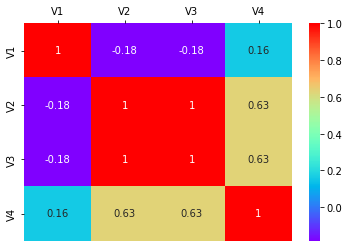

In [ ]:
from seaborn import heatmap

corr_map = heatmap(data.corr(), annot=True, cmap='rainbow')
corr_map.xaxis.tick_top()

In [ ]:
corr_map.xaxis.tick_top()

In [ ]:
from sklearn.model_selection import train_test_split
data_train, data_test, target_train, target_test = train_test_split(data, target)
data_train.shape, data_test.shape, target_train.shape, target_test.shape

((561, 4), (187, 4), (561,), (187,))

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knn= KNeighborsClassifier(n_neighbors=1)
knn.fit(data_train, target_train)
knn.score(data_train, target_train)

0.9269162210338681

[[522  48]
 [ 50 128]]


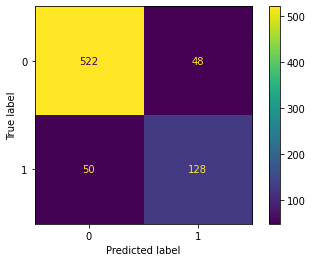

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

#pred_test = knn(data_test)
pred = knn.predict(data)
conf_mat = confusion_matrix(target, pred)
print(conf_mat)
ConfusionMatrixDisplay(conf_mat).plot()

#**Model Performance:**
##The model achieved a high number of true negatives (522) and true positives (128), indicating a strong ability to correctly classify both classes. However, there are a considerable number of false positives (48) and false negatives (50), suggesting some room for improvement, especially in reducing these errors.

#**Accuracy and Error Analysis:**
##The accuracy can be calculated as (True Positives + True Negatives) / Total Predictions, which in this case is (522 + 128) / 748 ≈ 0.8697, or approximately 86.97%. While this is a decent accuracy rate, the nearly 100 misclassifications point towards potential areas where the model might be improved, possibly through parameter tuning or by using a different algorithm.

#**Sensitivity and Specificity:**
##Sensitivity (Recall) for detecting positive cases is 128 / (128 + 50) ≈ 0.7191, or about 71.91%. This indicates the model's ability to correctly identify positive cases.
##Specificity for detecting negative cases is 522 / (522 + 48) ≈ 0.9157, or about 91.57%, which is quite high.
#**Implications for Medical Decisions:**
##In the context of blood transfusions, having a high specificity is crucial because it minimizes the risk of falsely identifying patients as needing a transfusion when they do not, which can avoid unnecessary medical procedures and associated risks. However, improving sensitivity is also important to ensure that all patients who truly need a transfusion receive one.